In [431]:
import pandas as pd
import numpy as np

In [432]:
# CLEAN THE DATA - MICROSOFT MAKING NEW MOVIE, WHAT TYPE OF MOVIE ARE THEY LOOKING FOR? 
    # RECENCY - Last 10 years of data
    # AUDIENCE
    # BUDGET

In [433]:
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', delimiter = ',')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [434]:
# Drop '$' from each of the columns with monetary value
df['worldwide_gross'] = df['worldwide_gross'].str[1:]
df['production_budget'] = df['production_budget'].str[1:]
df['domestic_gross'] = df['domestic_gross'].str[1:]

In [435]:
# Next, drop ',' from each of the columns of the money columns in order to convert them into an integer for manipulation
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').astype(float)
df['production_budget'] = df['production_budget'].str.replace(',', '').astype(float)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').astype(float)

In [436]:
# Wanted to convert to int, however some values turn negative.

#df['worldwide_gross'] = df['worldwide_gross'].astype(int)
#df['production_budget'] = df['production_budget'].astype(int)
#df['domestic_gross'] = df['domestic_gross'].astype(int)

In [437]:
df['worldwide_gross'] = df['worldwide_gross'].astype(np.int64)
df['production_budget'] = df['production_budget'].astype(np.int64)
df['domestic_gross'] = df['domestic_gross'].astype(np.int64)

In [438]:
# New dataframe to work with, one with only the necessary columns
df_dates_gross = df[['release_date', 'production_budget','worldwide_gross']]
df_dates_gross

,release_date,production_budget,worldwide_gross
0,"Dec 18, 2009",425000000,2776345279
1,"May 20, 2011",410600000,1045663875
2,"Jun 7, 2019",350000000,149762350
3,"May 1, 2015",330600000,1403013963
4,"Dec 15, 2017",317000000,1316721747
...,...,...,...
5777,"Dec 31, 2018",7000,0
5778,"Apr 2, 1999",6000,240495
5779,"Jul 13, 2005",5000,1338
5780,"Sep 29, 2015",1400,0


In [439]:
# New column 'Year' to find out what the budget of movies over the years have looks like.

df_dates_gross['year'] = df_dates_gross['release_date'].str[-4:]


<ipython-input-439-c03dcef09843>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates_gross['year'] = df_dates_gross['release_date'].str[-4:]


In [440]:
# New column 'Month' to find out what time of year movies are released.

df_dates_gross['month'] = df_dates_gross['release_date'].str[:3]
df_dates_gross_year = df_dates_gross

<ipython-input-440-13fb7a7d8525>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates_gross['month'] = df_dates_gross['release_date'].str[:3]


In [441]:
# Change year to int datatype in order to manipulate

df_dates_gross_year['year'] = pd.to_numeric(df_dates_gross_year['year'])

<ipython-input-441-fc9c3b049598>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates_gross_year['year'] = pd.to_numeric(df_dates_gross_year['year'])


In [442]:
df_dates_gross_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   worldwide_gross    5782 non-null   int64 
 3   year               5782 non-null   int64 
 4   month              5782 non-null   object
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [443]:
# Filters the dataset so that only moveis released past the year 2000 get returned
df_dates_gross_year = df_dates_gross_year[df_dates_gross_year['year'] > 2000]

In [444]:
# We dropped 1600~ rows from the dataset

df_dates_gross_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       4198 non-null   object
 1   production_budget  4198 non-null   int64 
 2   worldwide_gross    4198 non-null   int64 
 3   year               4198 non-null   int64 
 4   month              4198 non-null   object
dtypes: int64(3), object(2)
memory usage: 196.8+ KB


In [445]:
df_dates_gross_year.head()

,release_date,production_budget,worldwide_gross,year,month
0,"Dec 18, 2009",425000000,2776345279,2009,Dec
1,"May 20, 2011",410600000,1045663875,2011,May
2,"Jun 7, 2019",350000000,149762350,2019,Jun
3,"May 1, 2015",330600000,1403013963,2015,May
4,"Dec 15, 2017",317000000,1316721747,2017,Dec


In [449]:
# Divide dataset by year then add up releases per month
df_complete = df_dates_gross_year[['production_budget','worldwide_gross', 'year', 'month']]
df_complete.sort_values(by = 'year')

,production_budget,worldwide_gross,year,month
1209,49000000,72689126,2001,Nov
352,105000000,10364769,2001,Apr
2299,25000000,5516708,2001,Mar
344,109000000,87683966,2001,Dec
342,109000000,887210985,2001,Dec
...,...,...,...,...
671,75000000,0,2019,Dec
121,170000000,345004422,2019,Mar
194,150000000,0,2020,Dec
535,82000000,0,2020,Feb


In [469]:
df_new = df_complete
df_new

,production_budget,worldwide_gross,year,month
0,425000000,2776345279,2009,Dec
1,410600000,1045663875,2011,May
2,350000000,149762350,2019,Jun
3,330600000,1403013963,2015,May
4,317000000,1316721747,2017,Dec
...,...,...,...,...
5776,7000,900,2004,Dec
5777,7000,0,2018,Dec
5779,5000,1338,2005,Jul
5780,1400,0,2015,Sep


In [470]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_new['month'] = pd.Categorical(df_new['month'], categories=months, ordered=True)
df_new = df_new['month'].sort_values()
df_new = list(df_new)
df_new

<ipython-input-470-ffbcf43cce75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = pd.Categorical(df_new['month'], categories=months, ordered=True)


['Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',


In [468]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_2001['month'] = pd.Categorical(df_2001['month'], categories=months, ordered=True)
df2001list = df_2001['month'].sort_values()
df2001list = list(df2001list)
df2001list

<ipython-input-468-1f4d03381657>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2001['month'] = pd.Categorical(df_2001['month'], categories=months, ordered=True)


['Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Oct',


In [472]:
column_names = months

a = np.zeros(shape=(1,12), dtype = int)
testdf = pd.DataFrame(a, columns = column_names)
testdf

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0,0


In [473]:
for x in df_new:
    if x in column_names:
        testdf[x] += 1

In [515]:
list(testdf.value_counts().index)
yaxis = []

for x in list(testdf.value_counts().index):
    yaxis.append(x)

yaxis

[(252, 299, 358, 352, 285, 318, 310, 353, 380, 416, 339, 536)]

In [475]:
from matplotlib import pyplot as plt

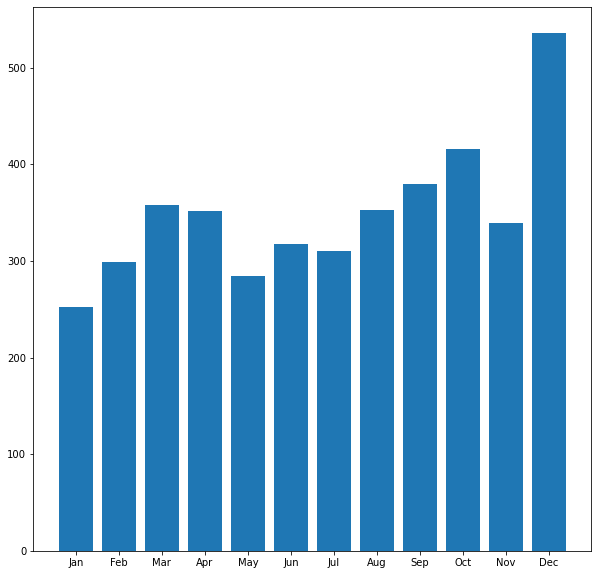

In [516]:
fig, ax = plt.subplots(figsize = (10, 10))
x = months
y = [252, 299, 358, 352, 285, 318, 310, 353, 380, 416, 339, 536]
ax.bar(x, y);
